In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_games = pd.read_csv('Video Games Sales.csv')

In [6]:
data_games.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [7]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [8]:
data_games.shape

(1907, 13)

In [9]:
data_games.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [10]:
data_games['Publisher']=data_games['Publisher'].fillna('Unknown',inplace=False)

In [13]:
data_games['Year'] = data_games['Year'].fillna(data_games['Year'].mode()[0],inplace=False)
data_games['Year'] = data_games['Year'].astype(int)

In [14]:
data_games.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [15]:
data_games.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.831148,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.873252,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2001.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [18]:
data_games.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

# Top 10 publishers

In [41]:
data_games.iloc[:,2:7:4]

,Game Title,Publisher
0,Wii Sports,Nintendo
1,Super Mario Bros.,Nintendo
2,Mario Kart Wii,Nintendo
3,Wii Sports Resort,Nintendo
4,Tetris,Nintendo
...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,Disney Interactive Studios
1903,Xenoblade Chronicles,Nintendo
1904,SingStar Abba,Sony Computer Entertainment
1905,FIFA Soccer World Championship,Electronic Arts


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Nintendo'),
  Text(2, 0, 'Sony Computer Entertainment'),
  Text(3, 0, 'Activision'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Sega'),
  Text(7, 0, 'Take-Two Interactive'),
  Text(8, 0, 'Capcom'),
  Text(9, 0, 'Konami Digital Entertainment')])

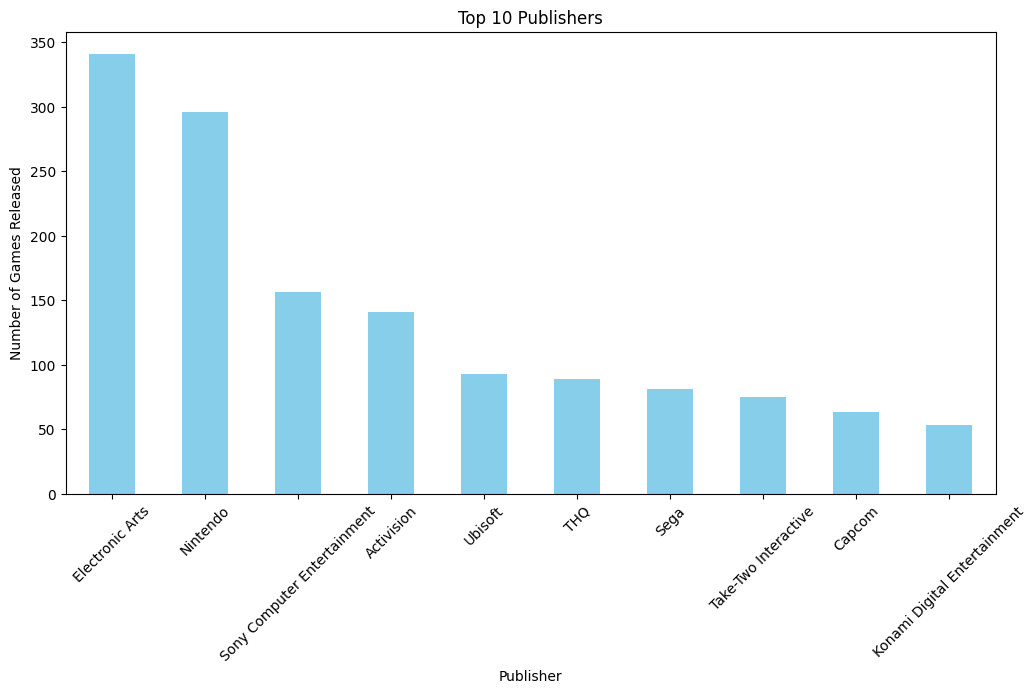

In [28]:
plt.figure(figsize=(12, 6)) # plot for the top 10 publishers in the world
top_publishers = data_games['Publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)

#finding which genre of gaming is most liked the gamers

In [42]:
data_games.iloc[:,2:6:3]

,Game Title,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Tetris,Puzzle
...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,Action
1903,Xenoblade Chronicles,Role-Playing
1904,SingStar Abba,Misc
1905,FIFA Soccer World Championship,Sports


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Platform'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

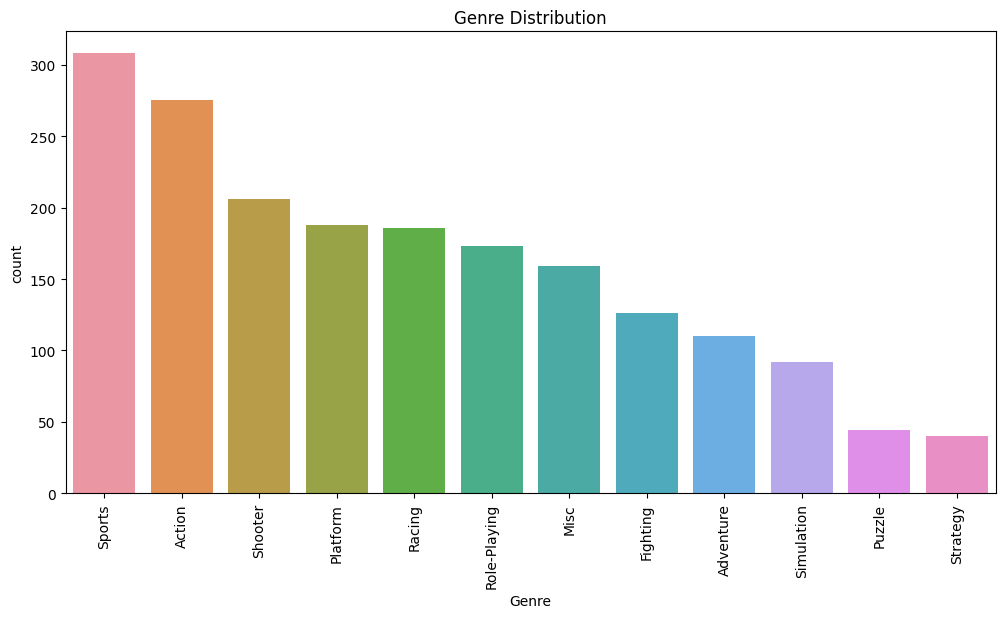

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=data_games, order=data_games['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xticks(rotation=90)

#sales of the games according to the regions

In [45]:
df = data_games
df = df.drop(['index','Rank','Review','Publisher','Platform','Year','Genre'],axis=1)
df.head()

,Game Title,North America,Europe,Japan,Rest of World,Global
0,Wii Sports,40.43,28.39,3.77,8.54,81.12
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,14.50,12.22,3.63,3.21,33.55
3,Wii Sports Resort,14.82,10.51,3.18,3.01,31.52
4,Tetris,23.20,2.26,4.22,0.58,30.26


Text(0, 0.5, 'Sales (in millions)')

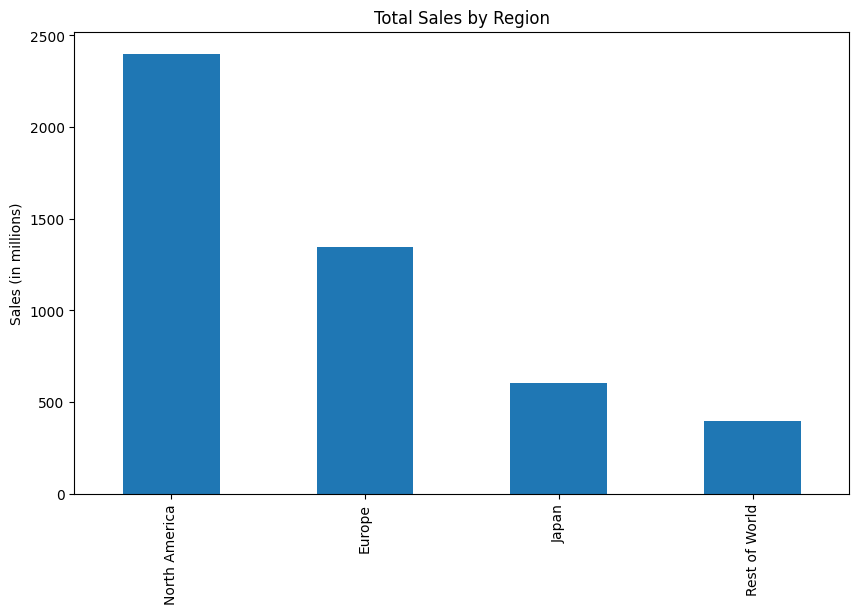

In [21]:
plt.figure(figsize=(10, 6))
data_games[['North America', 'Europe', 'Japan', 'Rest of World']].sum().plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Sales (in millions)')


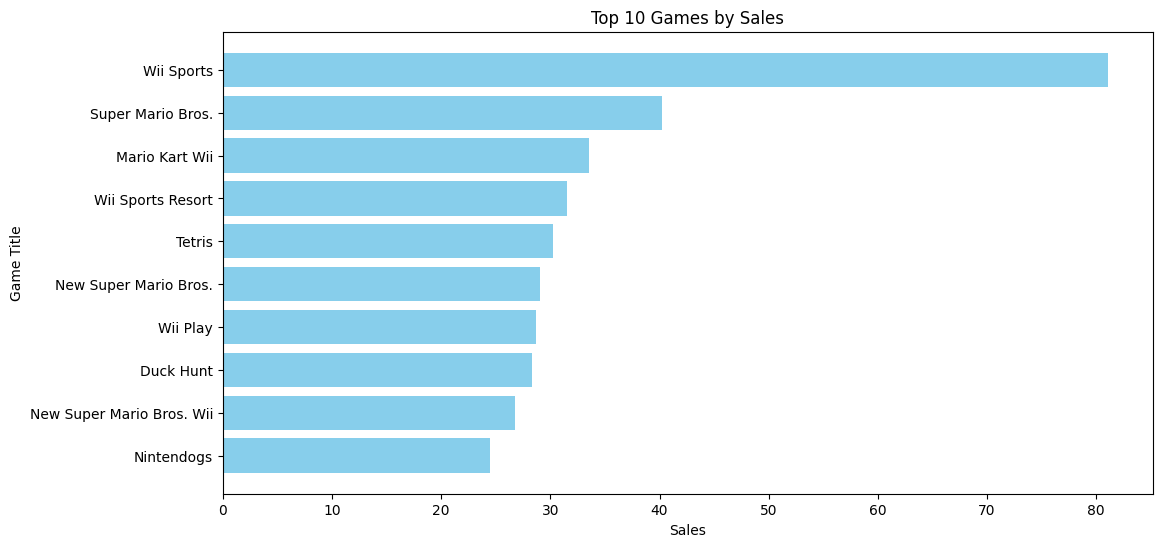

In [52]:
data = data_games.sort_values(by='Global', ascending=False)
top_10_sales = data.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10_sales['Game Title'], top_10_sales['Global'], color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Game Title')
plt.title('Top 10 Games by Sales')
plt.gca().invert_yaxis()

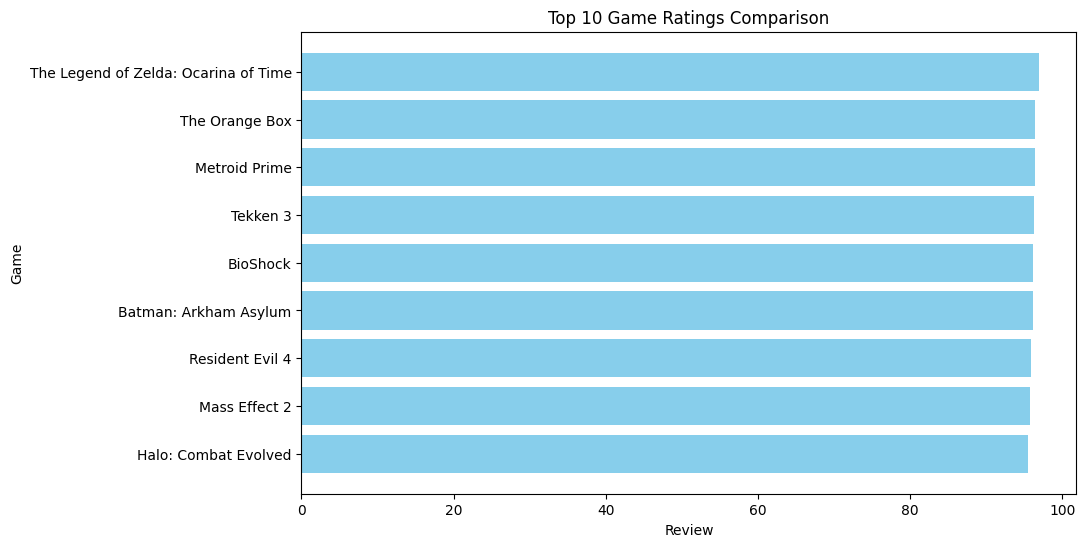

In [47]:
top_games = data_games.sort_values(by='Review', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_games['Game Title'], top_games['Review'], color='skyblue')
plt.xlabel('Review')
plt.ylabel('Game')
plt.title('Top 10 Game Ratings Comparison')
plt.gca().invert_yaxis()

#most used platforms

In [46]:
data_games.iloc[:,1:4]

,Rank,Game Title,Platform
0,1,Wii Sports,Wii
1,2,Super Mario Bros.,NES
2,3,Mario Kart Wii,Wii
3,4,Wii Sports Resort,Wii
4,5,Tetris,GB
...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA
1903,1904,Xenoblade Chronicles,Wii
1904,1905,SingStar Abba,PS3
1905,1906,FIFA Soccer World Championship,PS2


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'PS'),
  Text(2, 0, 'X360'),
  Text(3, 0, 'PS3'),
  Text(4, 0, 'Wii'),
  Text(5, 0, 'DS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'XB'),
  Text(8, 0, 'PC'),
  Text(9, 0, 'PSP'),
  Text(10, 0, 'NES'),
  Text(11, 0, 'N64'),
  Text(12, 0, 'GC'),
  Text(13, 0, 'GB'),
  Text(14, 0, 'SNES'),
  Text(15, 0, '3DS'),
  Text(16, 0, 'GEN'),
  Text(17, 0, 'DC'),
  Text(18, 0, 'SAT'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'SCD'),
  Text(21, 0, 'PSV')])

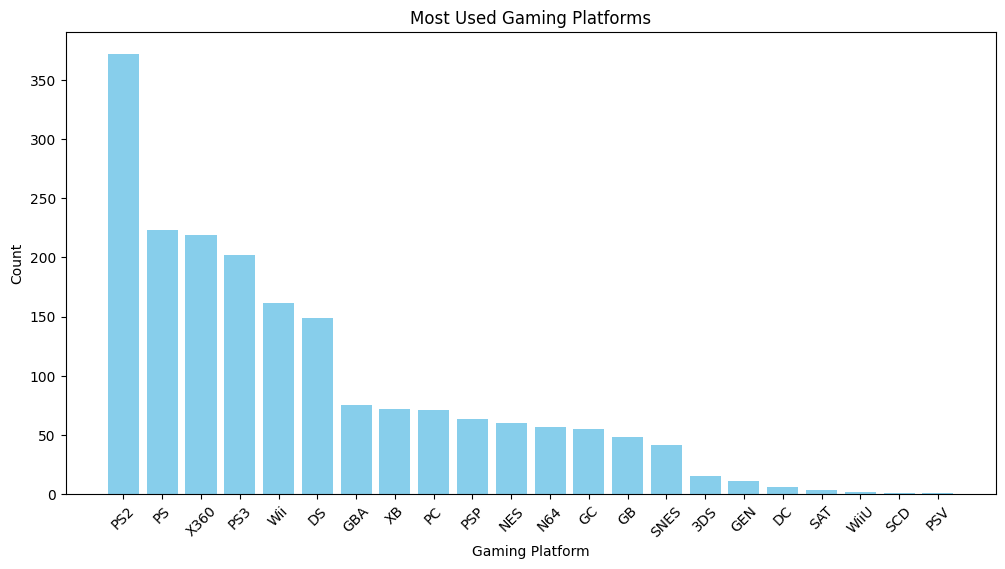

In [39]:
platform_counts = data_games['Platform'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(platform_counts.index, platform_counts.values, color='skyblue')
plt.xlabel('Gaming Platform')
plt.ylabel('Count')
plt.title('Most Used Gaming Platforms')
plt.xticks(rotation=45)